In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from PIL import Image

In [23]:
def apply_clahe(path, alpha, tile):
    img_bgr = cv2.imread(path)

    if img_bgr is None:
        print("Error: Could not load image.")
    else:
        # 1. Convert BGR to LAB color space
        img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

        # 2. Split the LAB image into L, A, and B channels
        l, a, b = cv2.split(img_lab)
        histL = cv2.calcHist([l], [0], None, [256], [0, 256])
        # 3. Apply CLAHE to the L channel
        clahe = cv2.createCLAHE(clipLimit=alpha, tileGridSize=tile)
        cl = clahe.apply(l)
        histCL = cv2.calcHist([cl], [0], None, [256], [0, 256])
        # 4. Merge the channels and convert back to BGR
        merged_lab = cv2.merge((cl, a, b))
        enhanced_img = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)

    return enhanced_img, histL, histCL

In [24]:
path_raw = "C:\\Users\\prita\\Desktop\\DIP\\Project\\raw-890\\raw-890\\3_img_.png"
path_ref = "C:\\Users\\prita\\Desktop\\DIP\\Project\\reference-890\\reference-890\\3_img_.png"

In [43]:
img_bgr = cv2.imread(path_ref)
enhanced_img,histL, histCL = apply_clahe(path_raw, 10, (25,25))

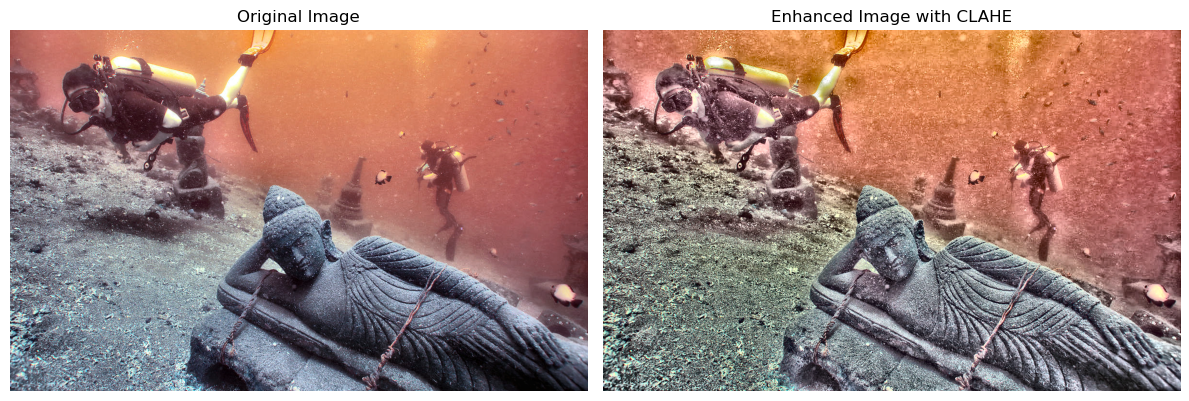

In [44]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Display the original image in the first subplot
ax[0].imshow(img_bgr)
ax[0].set_title('Original Image')
ax[0].axis('off') # Hide the axes

# Display the enhanced image in the second subplot
ax[1].imshow(enhanced_img)
ax[1].set_title('Enhanced Image with CLAHE')
ax[1].axis('off') # Hide the axes

plt.tight_layout()
plt.show()

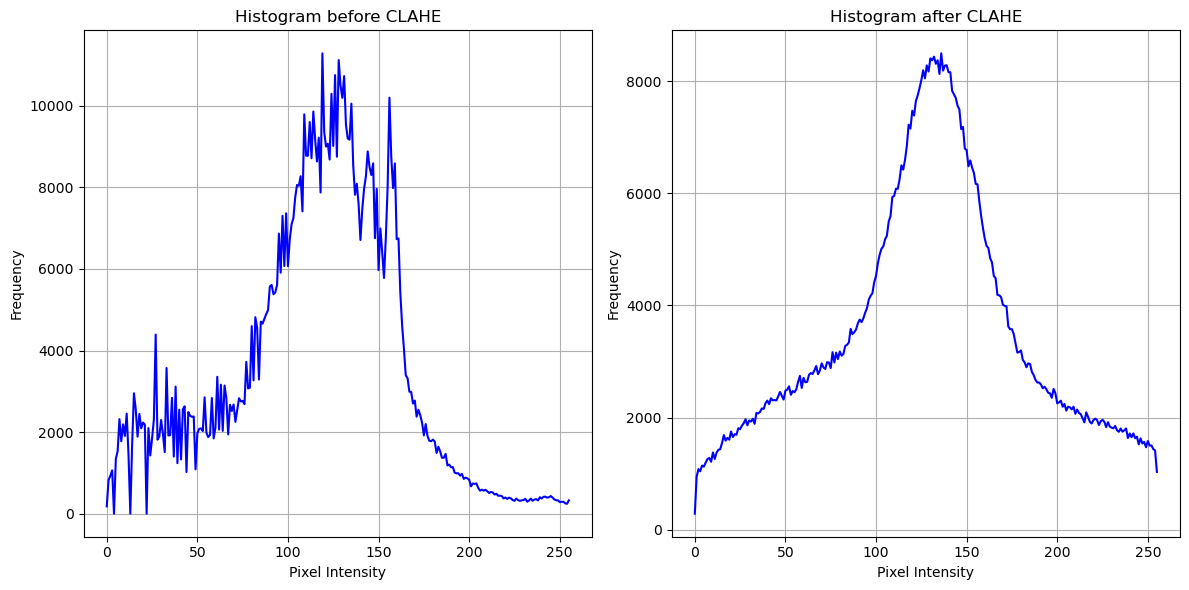

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 7. Plot the original histogram on the first subplot
ax[0].plot(histL, color='b')
ax[0].grid(True)
ax[0].set_title("Histogram before CLAHE")
ax[0].set_xlabel("Pixel Intensity")
ax[0].set_ylabel("Frequency")

# 8. Plot the enhanced histogram on the second subplot
ax[1].plot(histCL, color='b')
ax[1].grid(True)
ax[1].set_title("Histogram after CLAHE")
ax[1].set_xlabel("Pixel Intensity")
ax[1].set_ylabel("Frequency")

# 9. Adjust subplot parameters for a clean layout
plt.tight_layout()

# 10. Display the plot
plt.show()